In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

import posixpath

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [24]:
path = untar_data(URLs.FLOWERS)
path

PosixPath('/root/.fastai/data/oxford-102-flowers')

In [27]:
img_path = str(path.ls()[2])
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt')]

In [28]:
#train data with labels
train_data = []
train_data_labels = []
with open(path.ls()[0], 'r') as fp:
   line = fp.readline()
   while line:
     train_data.append(img_path[:-3] + line.split()[0])
     train_data_labels.append(line.split()[1])
     line = fp.readline()
#et_image_files(path.ls()[0])
train_data[:5]

['/root/.fastai/data/oxford-102-flowers/jpg/image_03860.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_06092.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_02400.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_02852.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_07710.jpg']

In [29]:
#test data with labels
test_data = []
test_data_labels = []
with open(path.ls()[1], 'r') as fp:
   line = fp.readline()
   while line:
     test_data.append(img_path[:-3] + line.split()[0])
     test_data_labels.append(line.split()[1])
     line = fp.readline()
test_data[:5]

['/root/.fastai/data/oxford-102-flowers/jpg/image_06977.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_00800.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_05038.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_06759.jpg',
 '/root/.fastai/data/oxford-102-flowers/jpg/image_01133.jpg']

In [0]:
data = ImageDataBunch.from_lists(Path(img_path), train_data, train_data_labels, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

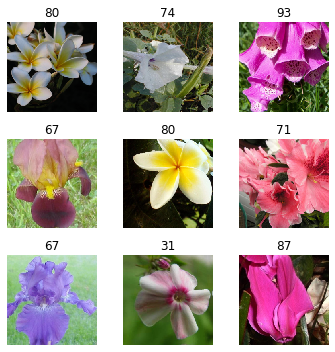

In [31]:
data.show_batch(rows=3, figsize=(5,5))

In [32]:
print(data.classes[:5])

['0', '1', '10', '100', '101']


In [33]:
len(data.classes), data.c

(102, 102)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 41.1MB/s]


In [35]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [36]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.960929,3.758059,0.843137,00:20
1,4.258075,1.720710,0.401961,00:20
2,2.987247,1.377099,0.323529,00:20
3,2.236525,1.341713,0.323529,00:21


In [0]:
learn.save('stage-1')

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

LabelList (204 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
73,84,5,88,25
Path: /root/.fastai/data/oxford-102-flowers/jpg

In [48]:
data.valid_ds

LabelList (204 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
73,84,5,88,25
Path: /root/.fastai/data/oxford-102-flowers/jpg

In [46]:
data

ImageDataBunch;

Train: LabelList (816 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
16,13,42,55,96
Path: /root/.fastai/data/oxford-102-flowers/jpg;

Valid: LabelList (204 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
73,84,5,88,25
Path: /root/.fastai/data/oxford-102-flowers/jpg;

Test: None

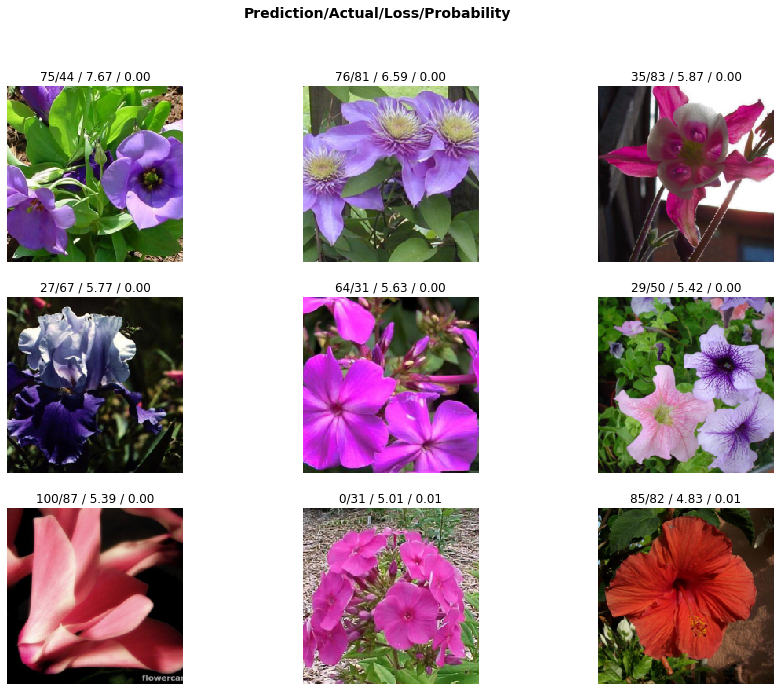

In [49]:
interp.plot_top_losses(9, figsize=(15,11))

In [50]:
doc(interp.plot_top_losses)

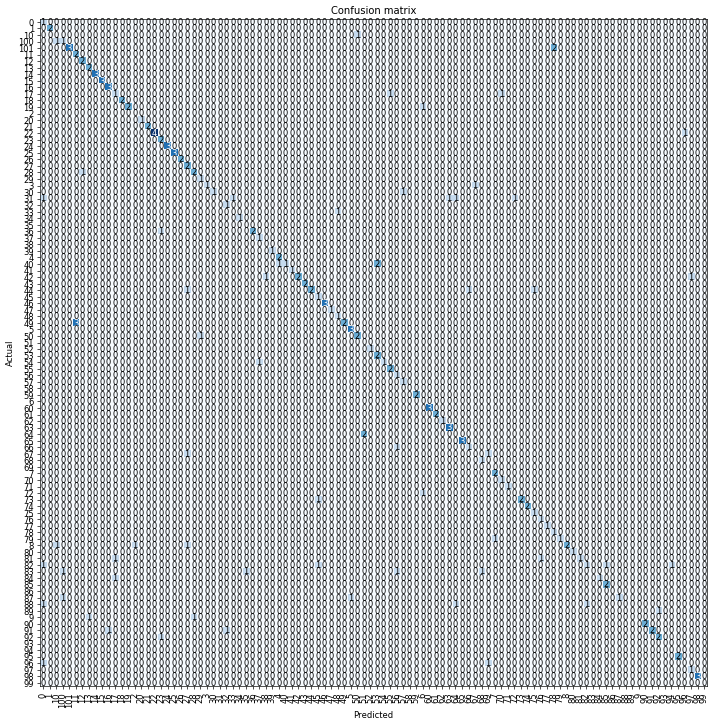

In [51]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [52]:
interp.most_confused(min_val=2)

[('49', '11', 3), ('101', '78', 2), ('40', '53', 2), ('64', '51', 2)]

In [0]:
learn.unfreeze()

In [54]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.977656,1.286635,0.343137,00:20


In [0]:
learn.load('stage-1');

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


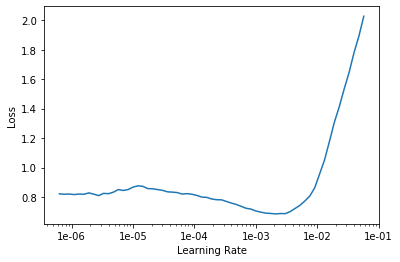

In [57]:
learn.recorder.plot()

In [58]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.004571,2.193176,0.500000,00:20
1,1.216283,3.727981,0.568627,00:20
2,1.086319,1.938653,0.401961,00:21
3,0.838910,1.304998,0.303922,00:21
